In [20]:
import numpy as np
import pandas as pd
from datetime import datetime, date
from utils_SA import simulate_model
import pypesto
import pypesto.optimize as optimize
import pypesto.visualize as visualize
import matplotlib.pyplot as plt
import time
import json

In [21]:
from inputFactorSpace import input_factor_names, df_input_factors

In [78]:
fn = 'logs/2022-09-05 120006_optimizer_result_log.hdf5'


result = store.read_result(fn, problem=True)

This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within logs/2022-09-05 120006_optimizer_result_log.hdf5.


/localdata1/lang_a4/memilio/epi_venv3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<AxesSubplot:title={'center':'Waterfall plot'}, xlabel='Ordered optimizer run', ylabel='Offsetted function value (relative to best start)'>

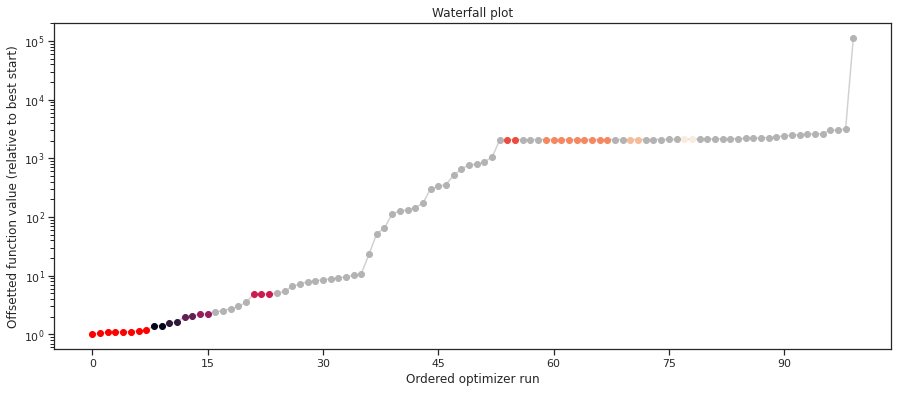

In [79]:
pypesto.visualize.waterfall(result, size=(15, 6))

In [80]:
#problem = problem.read(objective = objective1)

In [81]:
from inputFactorSpace import varying_input_factors

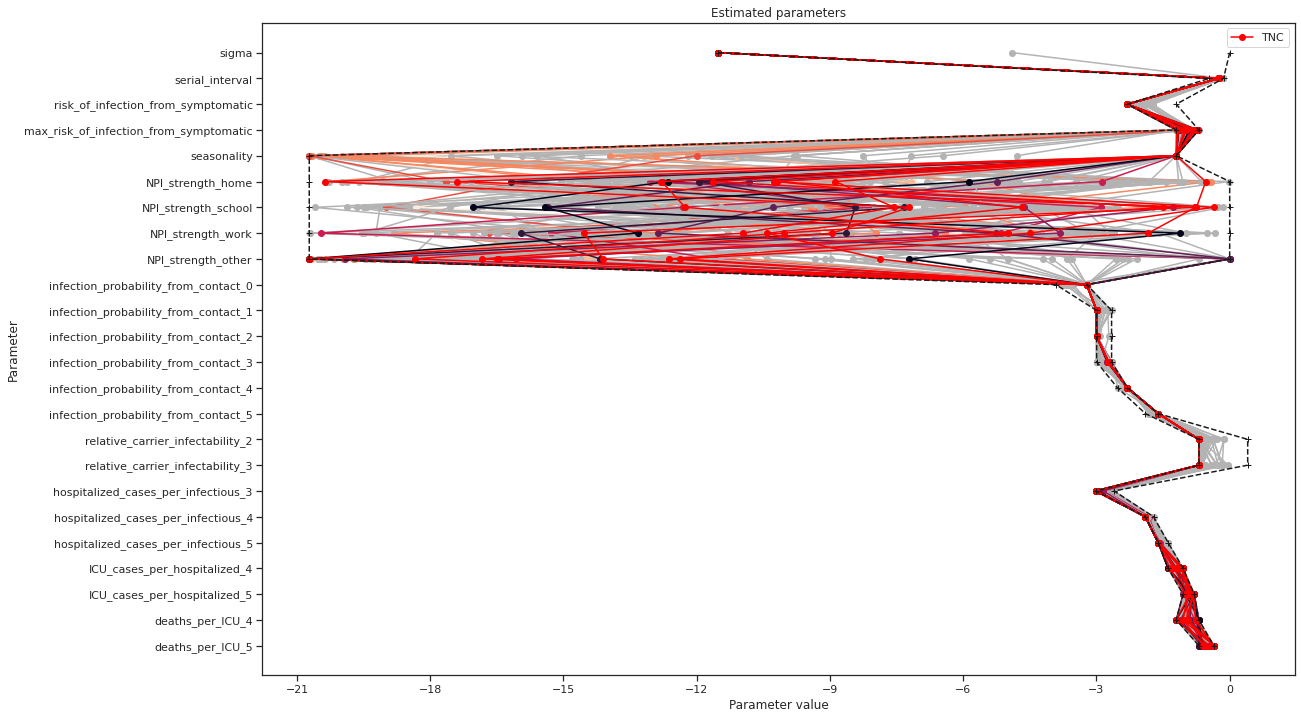

In [82]:
ax = visualize.parameters(
    [result],
    legends=["TNC"],
    balance_alpha=False,
)
ax.set_yticklabels(['sigma']+varying_input_factors)
ax.tick_params(axis='y', rotation=0)
#ax.set_yticklabels(varying_input_factors, rotation=90)

In [83]:
sample.geweke_test(result = result)
result.sample_result['burn_in']

Geweke burn-in index: 0


0

In [84]:
sample.effective_sample_size(result=result)
result.sample_result['effective_sample_size']

Estimated chain autocorrelation: 6324.476723235232
Estimated effective sample size: 15.809243219988236


15.809243219988236

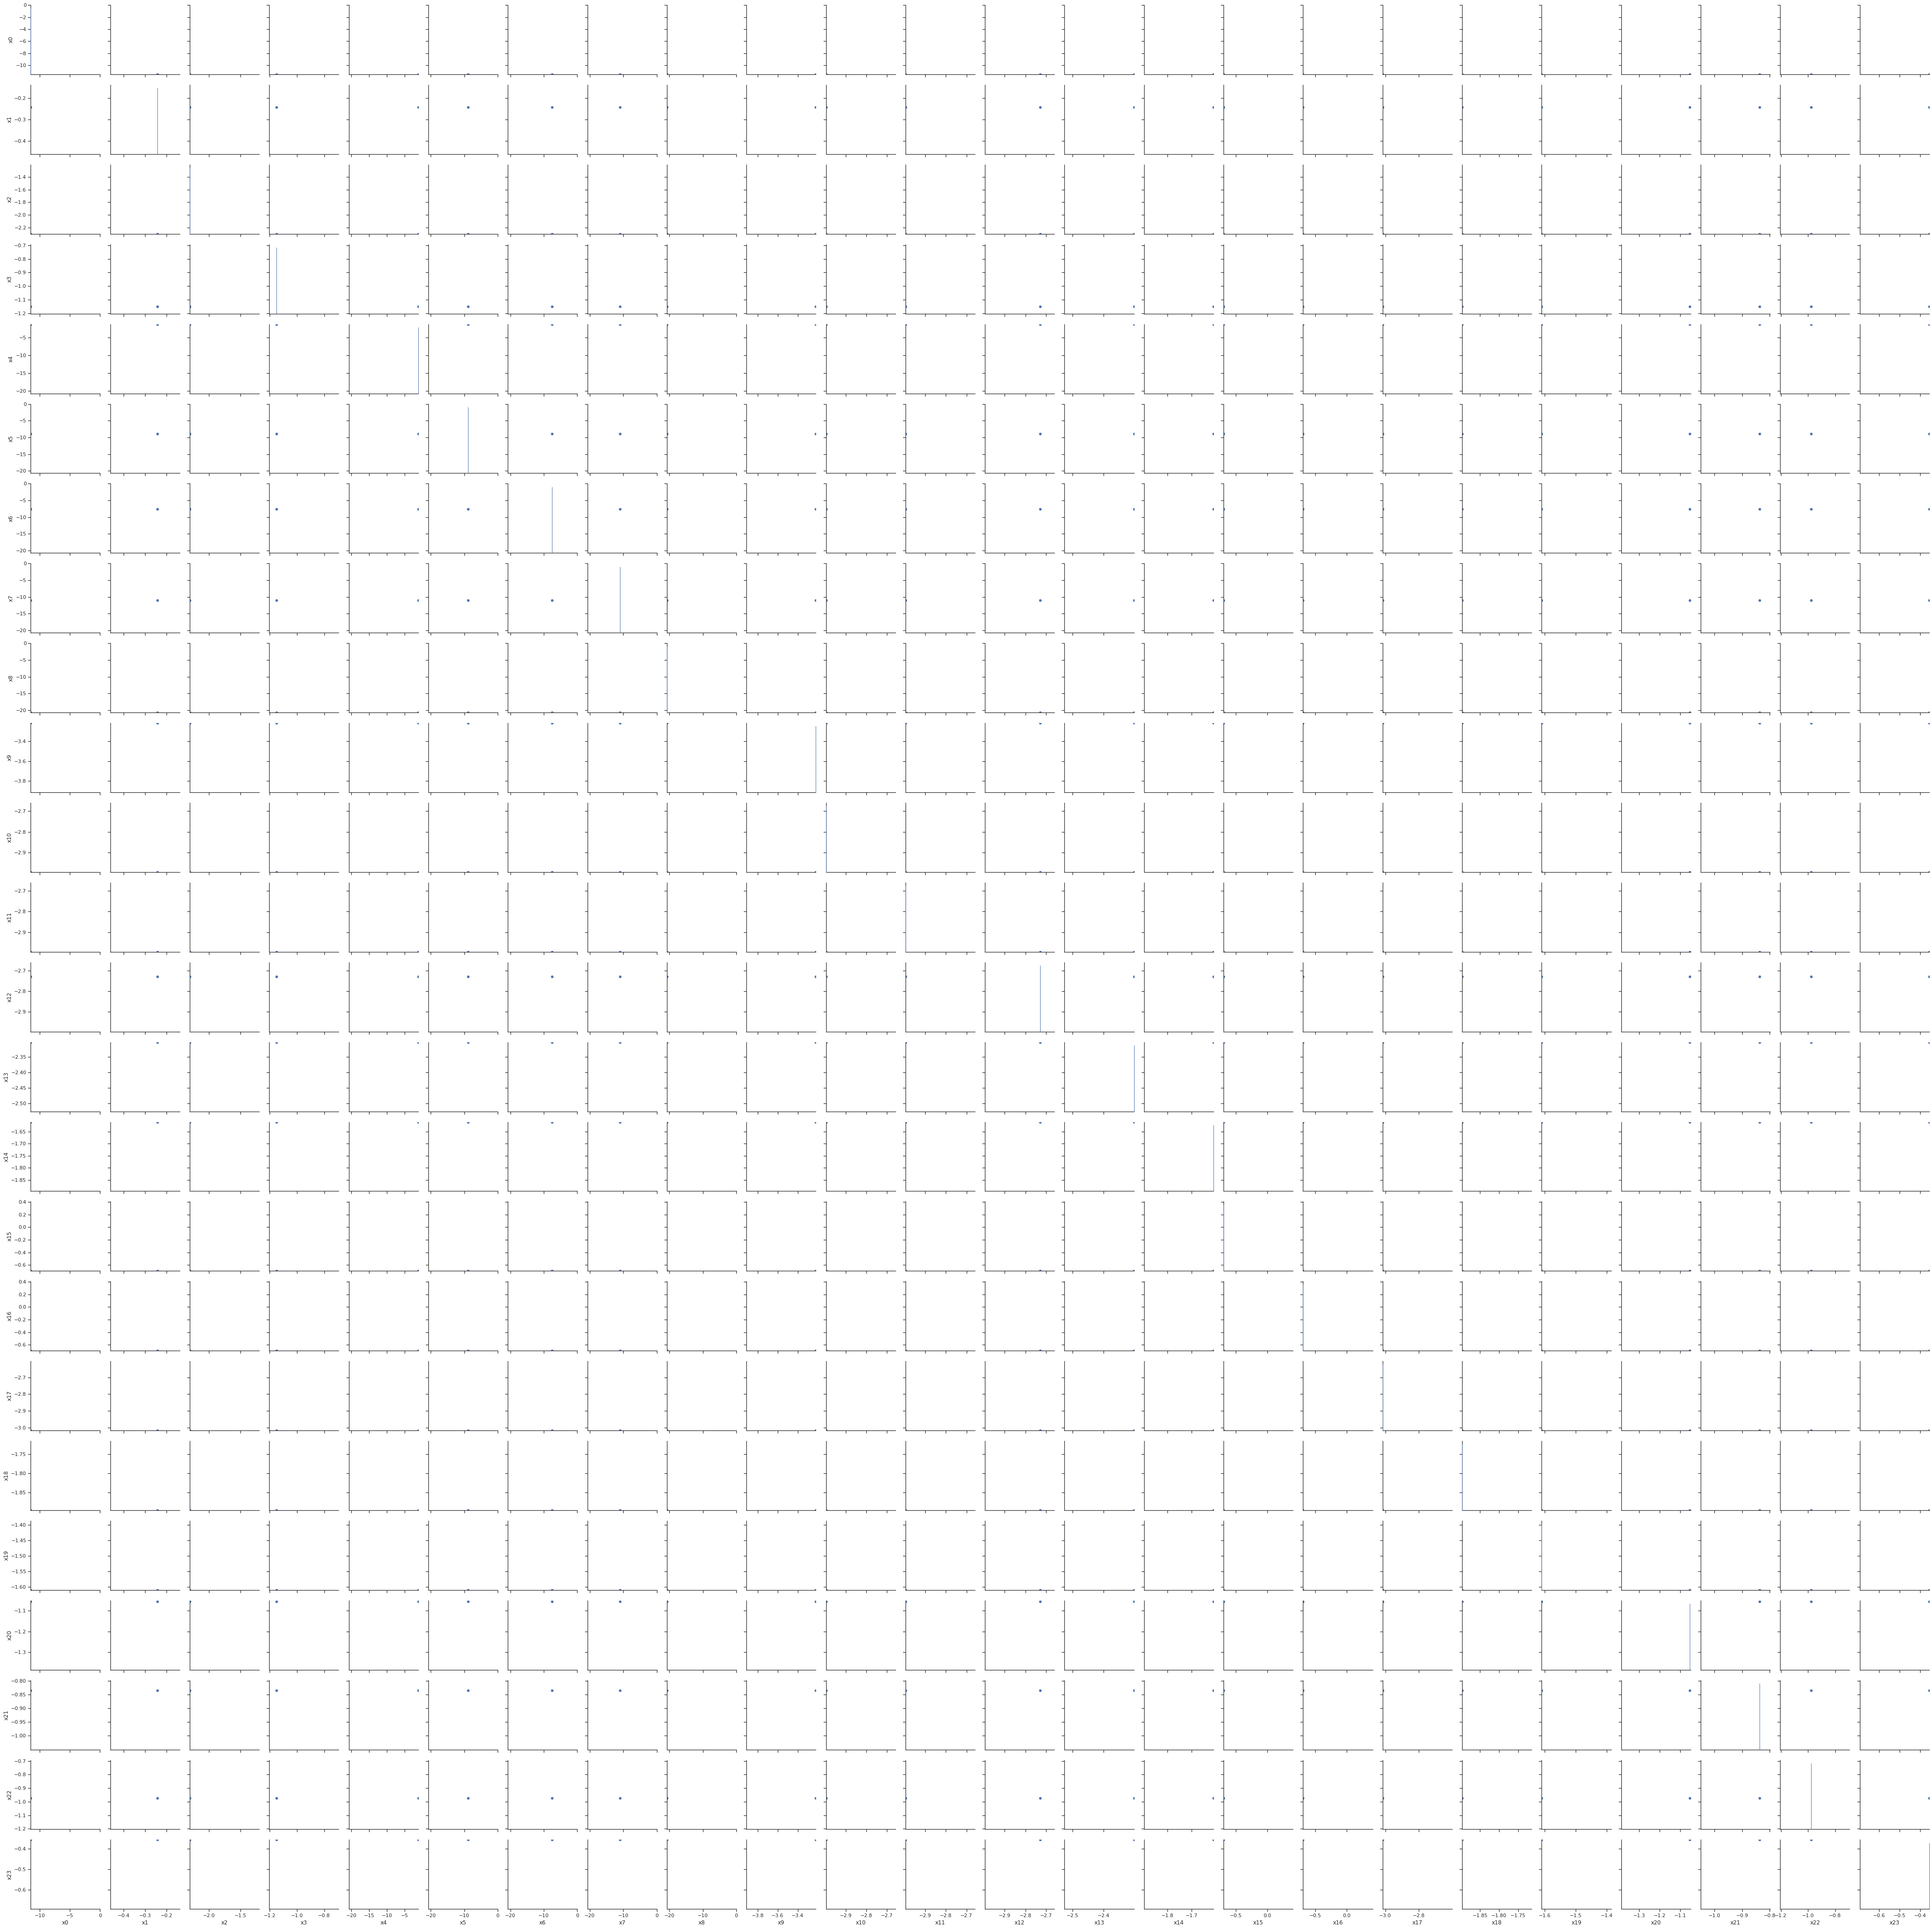

In [85]:
ax = visualize.sampling_scatter(result)
plt.savefig("plots/sample_scatter.png")

### Todos
- how to add samples after saving the result?
- profiles
- remove log scale

In [86]:
nr_params = len(varying_input_factors)+1
num_row = int(np.round(np.sqrt(nr_params)))
num_col = int(np.ceil(nr_params / num_row))

In [119]:
from functools import partial
from matplotlib.ticker import FormatStrFormatter


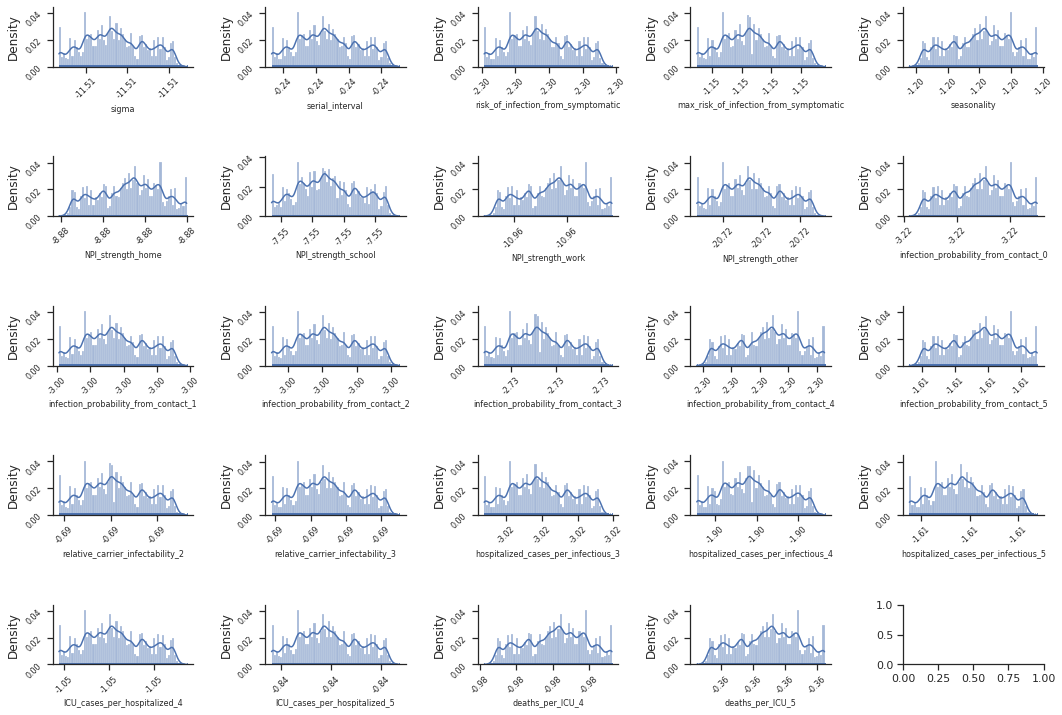

In [120]:
#fig, ax = plt.subplots(num_row, num_col, squeeze=False, figsize=size)
ax = visualize.sampling_1d_marginals(result, size =(15,10))
k = 0
for i in range(num_row):
    for j in range(num_col):
        if k < nr_params:
            ax[i,j].set_xlabel((['sigma']+varying_input_factors)[k], fontsize=8 )
            k += 1
            ax[i,j].tick_params(axis='both', which='major', labelsize=8, labelrotation=45)
            ax[i,j].tick_params(axis='both', which='minor', labelsize=8, labelrotation=45)
            
            #ax[i, j].ticklabel_format(useOffset=False)
            ax[i, j].set_xscale('function', functions=(np.exp, np.log))
            ax[i, j].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.subplots_adjust(hspace=1.5)

best values:  [7.85464089e-01 1.00000000e-01 4.95966415e-01 3.00000000e-01
 5.79597104e-05 6.58542928e-02 8.57427242e-07 9.73658298e-05
 4.00000000e-02 5.00000000e-02 5.00000000e-02 6.62319506e-02
 1.00000000e-01 2.00000000e-01 5.00000000e-01 5.00000000e-01
 4.90000000e-02 1.50000000e-01 2.00000000e-01 2.50000000e-01
 3.52715093e-01 4.74876203e-01 5.00166397e-01]
(51, 3)
[2022-09-05 08:17:41.202] [info] Adaptive step sizing successful to tolerances.


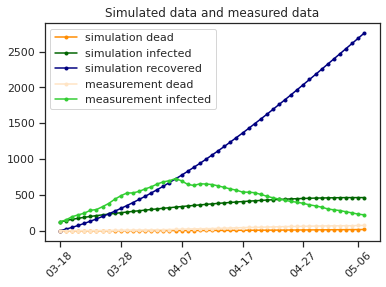

In [57]:
best_values = np.exp(result.optimize_result.as_list()[0]['x'][1:])
print("best values: ", best_values)
static_params['output_index'] = [Compartments.index("Dead"), Compartments.index("Infected"), Compartments.index("Recovered")]
simulation = simulate_model({**static_params, **dict(zip(varying_input_factors, best_values)), **dict_fixed_factors})
print(simulation.shape)

datelist = np.array(pd.date_range(datetime(start_year, start_month,
                        start_day), periods=days, freq='D').strftime('%m-%d').tolist())

tick_range = (np.arange(int(days / 10) + 1) * 10)
tick_range[-1] -= 1
fig, ax = plt.subplots()
ax.plot(simulation[:, 0], 'o-', markersize = 3, label='simulation dead', color="darkorange") 
ax.plot(simulation[:, 1], 'o-', markersize = 3, label='simulation infected', color="darkgreen") 
ax.plot(simulation[:, 2], 'o-', markersize = 3, label='simulation recovered', color="navy") 
ax.plot(dead_cases, 'o-', markersize = 3, label='measurement dead', color = "bisque")
ax.plot(infected_cases, 'o-', markersize = 3, label='measurement infected', color = "limegreen")
#ax.plot(recovered_cases, 'o-', markersize = 3, label='measurement recovered', color = "royalblue")
ax.set_title("Simulated data and measured data")
ax.set_xticks(tick_range)
ax.set_xticklabels(datelist[tick_range], rotation=45)
ax.legend()
fig.tight_layout
plt.show()
#fig.savefig('plots/'+ time.strftime("%Y-%m-%d %H%M%S") + '_Plot_best_simulation.pdf')
#plt.close()

# Optimization with 80 Parameters

In [128]:
fn80 = 'logs/2022-09-07 132402_optimizer_result_log.hdf5'
result80 = store.read_result(fn80, problem=True)

This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within logs/2022-09-07 132402_optimizer_result_log.hdf5.


/localdata1/lang_a4/memilio/epi_venv3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<AxesSubplot:title={'center':'Waterfall plot'}, xlabel='Ordered optimizer run', ylabel='Offsetted function value (relative to best start)'>

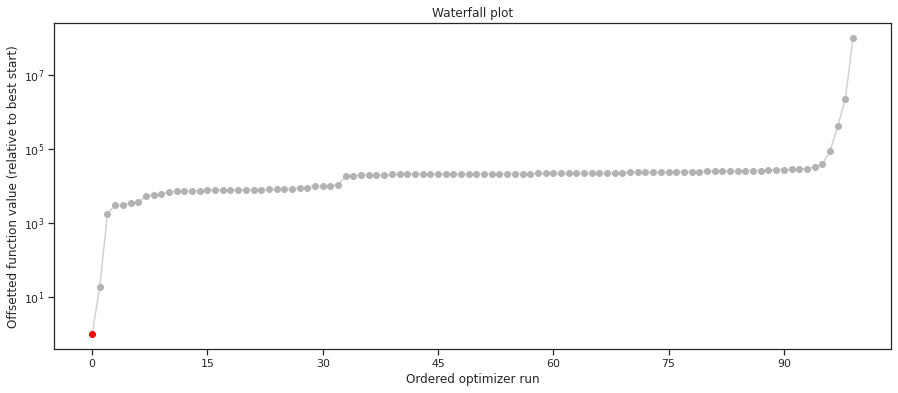

In [102]:
pypesto.visualize.waterfall(result80, size=(15, 6))

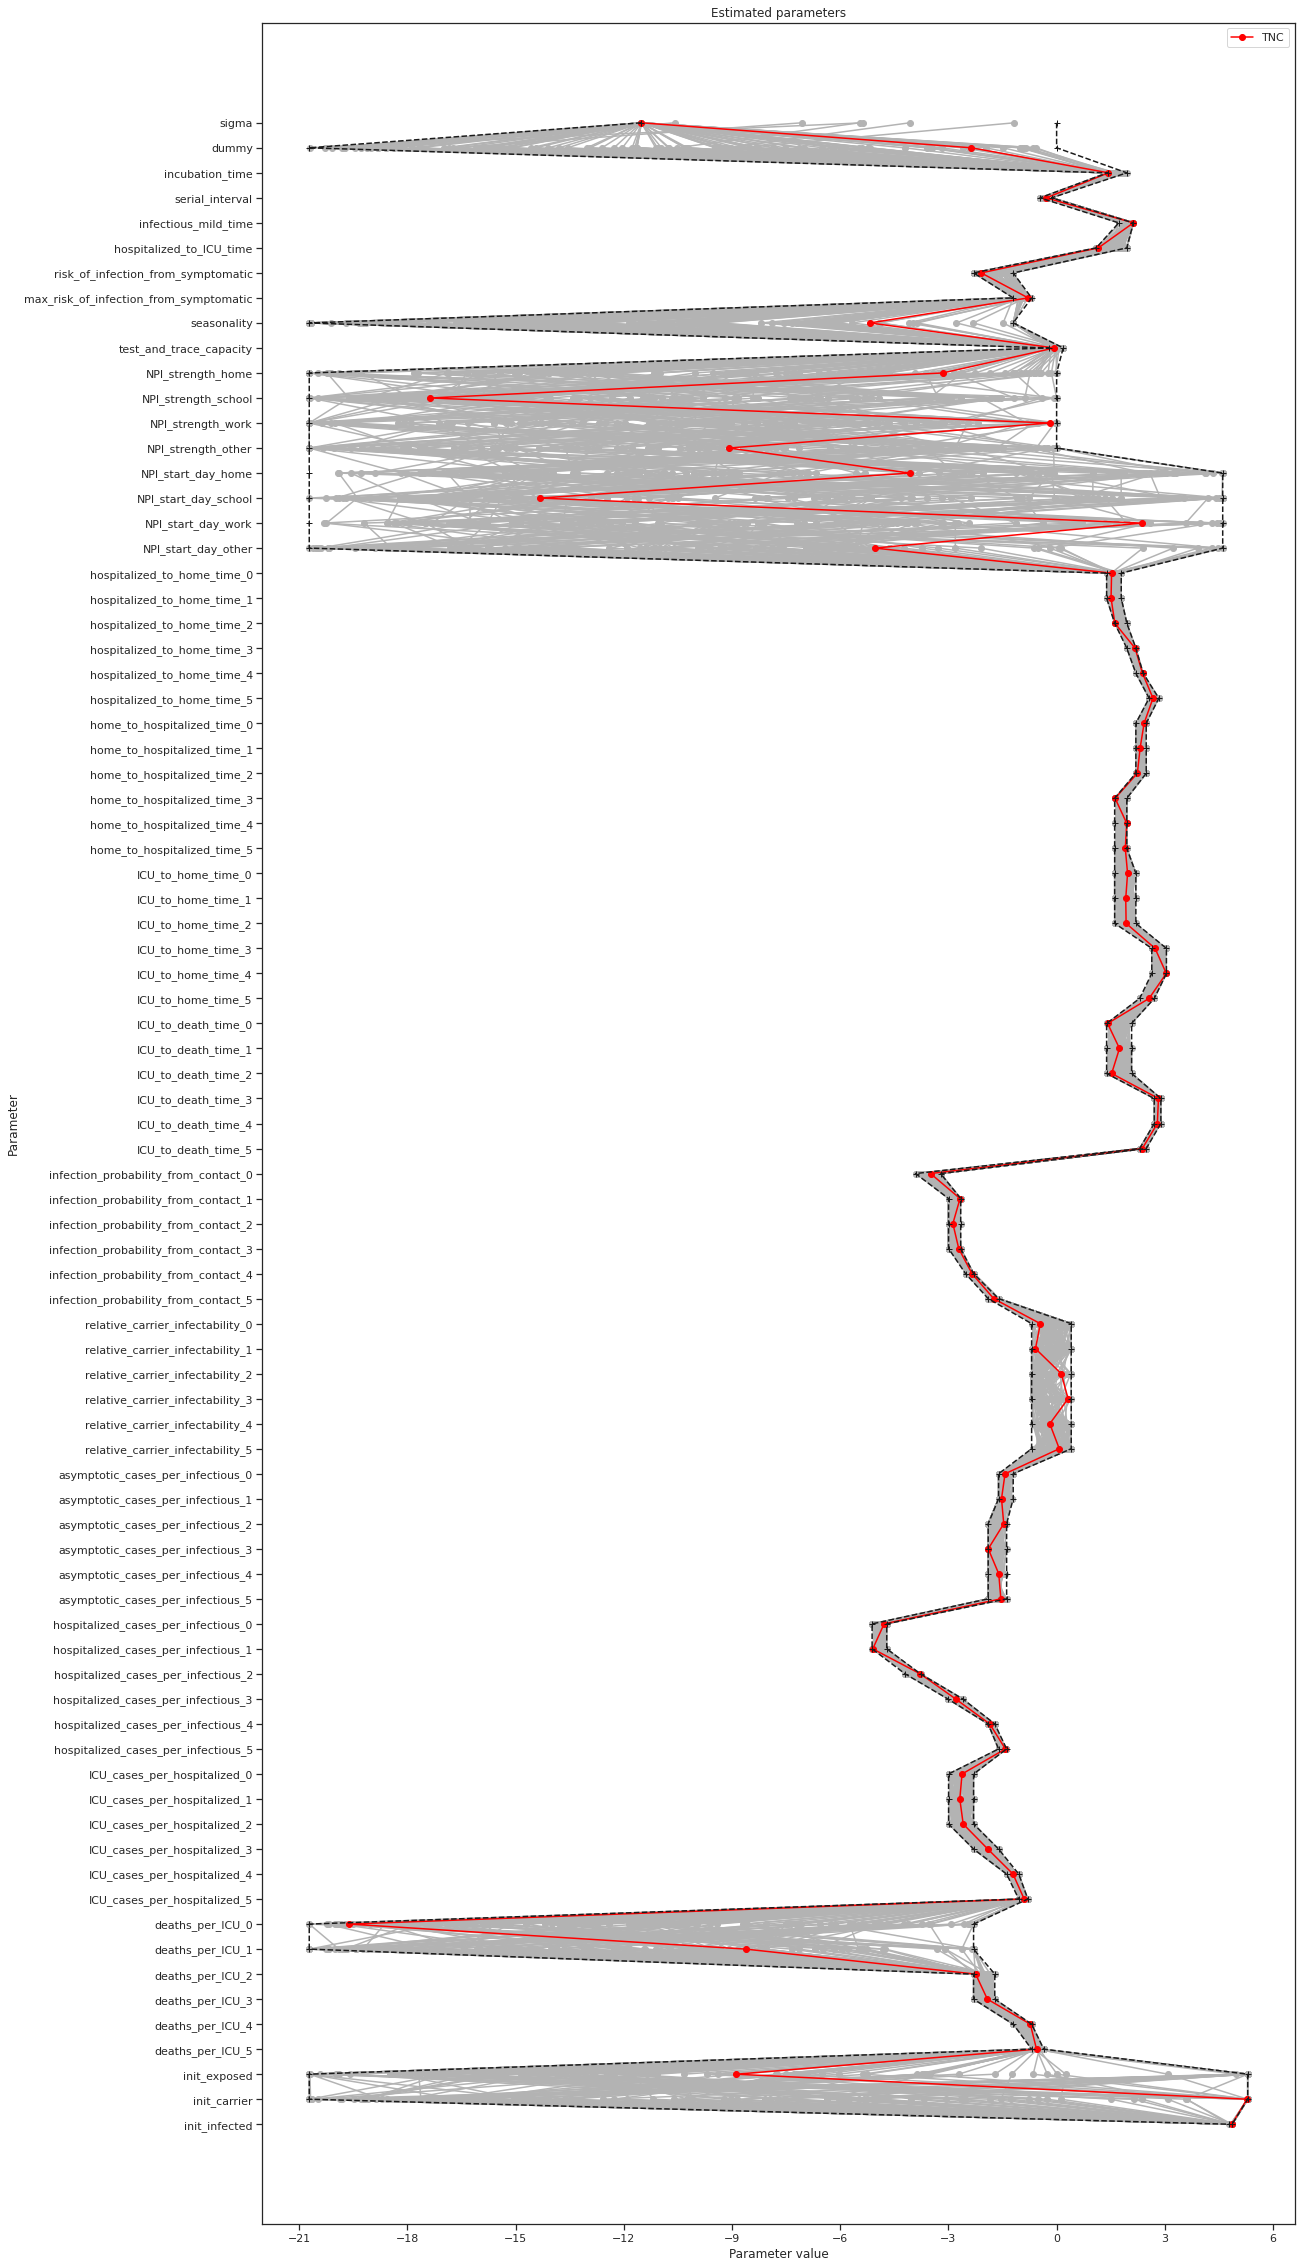

In [108]:
ax = visualize.parameters(
    [result80],
    legends=["TNC"],
    balance_alpha=False,
)
ax.set_yticklabels(['sigma']+input_factor_names)
ax.tick_params(axis='y', rotation=0)
#ax.set_xscale('function', functions=(np.exp, np.log))

In [133]:
# load data
data_dict = {}
with open(path_data) as f:
    lines = f.readlines()
    #data_dict.update(lines[0])
    print(lines[-1])
    for i in range(len(lines)-1):
        (key, value) = lines[i].split(":")
        value = json.loads(value)
        data_dict[key] = value
print(data_dict.keys())

start_dataset = 32
number_of_days = days
print(data_dict['categories'][start_dataset])
print(start_year, start_month, start_day)

# when used for a different time period, initial numbers must be matched first. 
# Saved simulation is from start day 0, therefore no initial numbers in Hospitalized, Infected and Recovered
# Divide by 100 because of the population size used in the model
#dataset = np.zeros((number_of_days+1, 2))
#dataset[:, 0] = np.array(data_dict['currently_infected'][start_dataset:number_of_days+1+start_dataset])/100.0
#dataset[:, 1] = np.array(data_dict['total_deaths'][start_dataset:number_of_days+1+start_dataset])/100.0

dead_cases = np.array(data_dict['total_deaths'][start_dataset:number_of_days+1+start_dataset])/100.0
infected_cases = np.array(data_dict['currently_infected'][start_dataset:number_of_days+1+start_dataset])/100.0
print(dead_cases)
print(infected_cases)

source : "https://www.worldometers.info/coronavirus/country/germany/#graph-deaths-daily"

dict_keys(['categories', 'currently_infected', 'total_deaths', 'new_recoveries'])
Mar 18, 2020
2020 3 18
[ 0.28  0.44  0.68  0.84  0.94  1.23  1.59  2.06  2.67  3.51  4.33  5.41
  6.45  7.75  9.32 11.09 12.78 14.48 15.89 18.16 20.23 23.57 26.16 27.45
 28.81 30.33 32.06 35.08 38.18 40.67 43.68 45.55 46.59 48.8  51.05 53.35
 55.96 57.82 58.99 59.98 61.49 63.38 64.92 66.49 67.62 68.38 68.92 70.19
 70.19 73.02 74.19]
[121.94 151.61 196.   220.71 245.13 284.8  295.42 335.7  379.98 438.62
 487.81 526.83 527.4  549.33 583.49 612.45 653.06 682.44 698.34 728.59
 695.59 646.39 632.12 655.13 651.71 645.21 625.66 605.02 583.35 566.31
 539.15 537.69 530.83 506.85 481.48 459.13 442.33 424.17 408.14 397.72
 381.09 361.74 346.47 328.6  304.15 291.29 281.72 264.33 248.88 231.64
 221.11]


best values:  [9.42811855e-02 4.21117177e+00 7.50137952e-01 8.39382245e+00
 3.17761974e+00 1.23484433e-01 4.54552409e-01 5.62134558e-03
 9.38022584e-01 4.24640851e-02 2.87892608e-08 8.22337772e-01
 1.12509682e-04 1.71251307e-02 6.03273657e-07 1.06607879e+01
 6.46063665e-03 4.59071904e+00 4.52456311e+00 5.02310295e+00
 8.80018229e+00 1.08209448e+01 1.44674952e+01 1.13133658e+01
 1.01180688e+01 9.38889657e+00 5.05933046e+00 6.98912979e+00
 6.71319491e+00 7.15173662e+00 6.79911155e+00 6.86695184e+00
 1.53244895e+01 2.09282075e+01 1.29874465e+01 4.11102292e+00
 5.71542017e+00 4.59795412e+00 1.68399815e+01 1.63293464e+01
 1.07540817e+01 3.03036670e-02 6.87026202e-02 5.63407942e-02
 6.62700061e-02 9.57502996e-02 1.74753793e-01 6.36323650e-01
 5.56638722e-01 1.13692979e+00 1.37466154e+00 8.27104195e-01
 1.07693345e+00 2.39206601e-01 2.17006998e-01 2.30844026e-01
 1.50173255e-01 2.01049136e-01 2.12973013e-01 8.36135792e-03
 6.10963125e-03 2.28719122e-02 6.07174543e-02 1.56607732e-01
 2.4146423

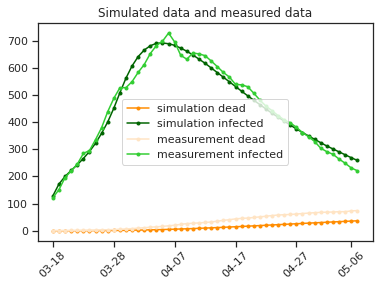

In [135]:
best_values = np.exp(result80.optimize_result.as_list()[0]['x'][1:])
days = 50
print("best values: ", best_values)
static_params['output_index'] = [Compartments.index("Dead"), Compartments.index("Infected"), Compartments.index("Recovered")]
simulation = simulate_model({**static_params, **dict(zip(input_factor_names, best_values))})
print(simulation.shape)

datelist = np.array(pd.date_range(datetime(start_year, start_month,
                        start_day), periods=days, freq='D').strftime('%m-%d').tolist())

tick_range = (np.arange(int(days / 10) + 1) * 10)
tick_range[-1] -= 1
fig, ax = plt.subplots()
ax.plot(simulation[:, 0], 'o-', markersize = 3, label='simulation dead', color="darkorange") 
ax.plot(simulation[:, 1], 'o-', markersize = 3, label='simulation infected', color="darkgreen") 
#ax.plot(simulation[:, 2], 'o-', markersize = 3, label='simulation recovered', color="navy") 
ax.plot(dead_cases, 'o-', markersize = 3, label='measurement dead', color = "bisque")
ax.plot(infected_cases, 'o-', markersize = 3, label='measurement infected', color = "limegreen")
#ax.plot(recovered_cases, 'o-', markersize = 3, label='measurement recovered', color = "royalblue")
ax.set_title("Simulated data and measured data")
ax.set_xticks(tick_range)
ax.set_xticklabels(datelist[tick_range], rotation=45)
ax.legend()
fig.tight_layout
plt.show()
#fig.savefig('plots/'+ time.strftime("%Y-%m-%d %H%M%S") + '_Plot_best_simulation.pdf')
#plt.close()

best values:  [9.42811855e-02 4.21117177e+00 7.50137952e-01 8.39382245e+00
 3.17761974e+00 1.23484433e-01 4.54552409e-01 5.62134558e-03
 9.38022584e-01 4.24640851e-02 2.87892608e-08 8.22337772e-01
 1.12509682e-04 1.71251307e-02 6.03273657e-07 1.06607879e+01
 6.46063665e-03 4.59071904e+00 4.52456311e+00 5.02310295e+00
 8.80018229e+00 1.08209448e+01 1.44674952e+01 1.13133658e+01
 1.01180688e+01 9.38889657e+00 5.05933046e+00 6.98912979e+00
 6.71319491e+00 7.15173662e+00 6.79911155e+00 6.86695184e+00
 1.53244895e+01 2.09282075e+01 1.29874465e+01 4.11102292e+00
 5.71542017e+00 4.59795412e+00 1.68399815e+01 1.63293464e+01
 1.07540817e+01 3.03036670e-02 6.87026202e-02 5.63407942e-02
 6.62700061e-02 9.57502996e-02 1.74753793e-01 6.36323650e-01
 5.56638722e-01 1.13692979e+00 1.37466154e+00 8.27104195e-01
 1.07693345e+00 2.39206601e-01 2.17006998e-01 2.30844026e-01
 1.50173255e-01 2.01049136e-01 2.12973013e-01 8.36135792e-03
 6.10963125e-03 2.28719122e-02 6.07174543e-02 1.56607732e-01
 2.4146423

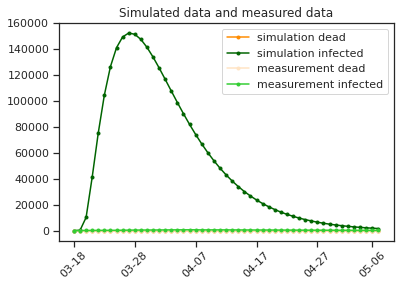

In [131]:
best_values = np.exp(result80.optimize_result.as_list()[0]['x'][1:])
print("best values: ", best_values)
static_params['output_index'] = [Compartments.index("Dead"), Compartments.index("Infected"), Compartments.index("Recovered")]
simulation = simulate_model({**static_params, **dict(zip(varying_input_factors, best_values)), **dict_fixed_factors})
print(simulation.shape)

datelist = np.array(pd.date_range(datetime(start_year, start_month,
                        start_day), periods=days, freq='D').strftime('%m-%d').tolist())

tick_range = (np.arange(int(days / 10) + 1) * 10)
tick_range[-1] -= 1
fig, ax = plt.subplots()
ax.plot(simulation[:, 0], 'o-', markersize = 3, label='simulation dead', color="darkorange") 
ax.plot(simulation[:, 1], 'o-', markersize = 3, label='simulation infected', color="darkgreen") 
#ax.plot(simulation[:, 2], 'o-', markersize = 3, label='simulation recovered', color="navy") 
ax.plot(dead_cases, 'o-', markersize = 3, label='measurement dead', color = "bisque")
ax.plot(infected_cases, 'o-', markersize = 3, label='measurement infected', color = "limegreen")
#ax.plot(recovered_cases, 'o-', markersize = 3, label='measurement recovered', color = "royalblue")
ax.set_title("Simulated data and measured data")
ax.set_xticks(tick_range)
ax.set_xticklabels(datelist[tick_range], rotation=45)
ax.legend()
fig.tight_layout
plt.show()